In [1]:
import pandas as pd
import numpy as np

In [10]:
df = pd.read_csv(r"C:\Users\sekha\Downloads\supply_chain_data.csv")

# Supply Chain Performance Evaluation

### Supplier Assessment: suppliers based on Lead Times, Defect Rates, and Inspection Outcomes

In [12]:
print(df.columns.tolist())


['Product type', 'SKU', 'Price', 'Availability', 'Number of products sold', 'Revenue generated', 'Customer demographics', 'Stock levels', 'Lead times', 'Order quantities', 'Shipping times', 'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location', 'Lead time', 'Production volumes', 'Manufacturing lead time', 'Manufacturing costs', 'Inspection results', 'Defect rates', 'Transportation modes', 'Routes', 'Costs']


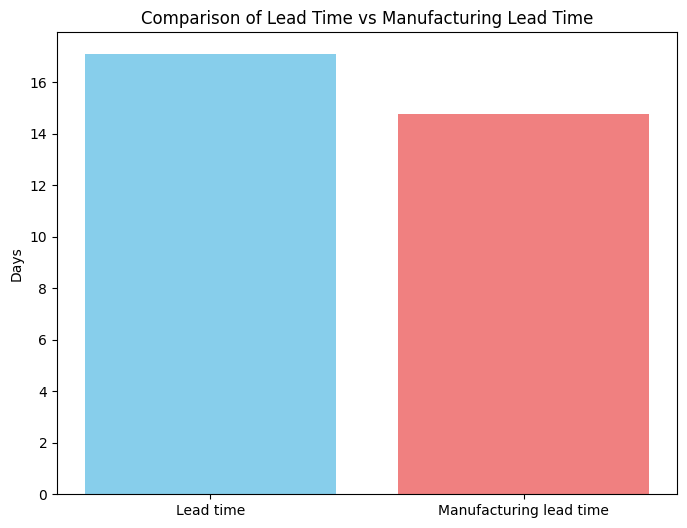

In [14]:
import matplotlib.pyplot as plt

# Prepare data for plotting
categories = ['Lead time', 'Manufacturing lead time']
values = [
    df['Lead time'].mean(),  # or sum(), depending on your goal
    df['Manufacturing lead time'].mean()
]

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=['skyblue', 'lightcoral'])
plt.title('Comparison of Lead Time vs Manufacturing Lead Time')
plt.ylabel('Days')
plt.show()


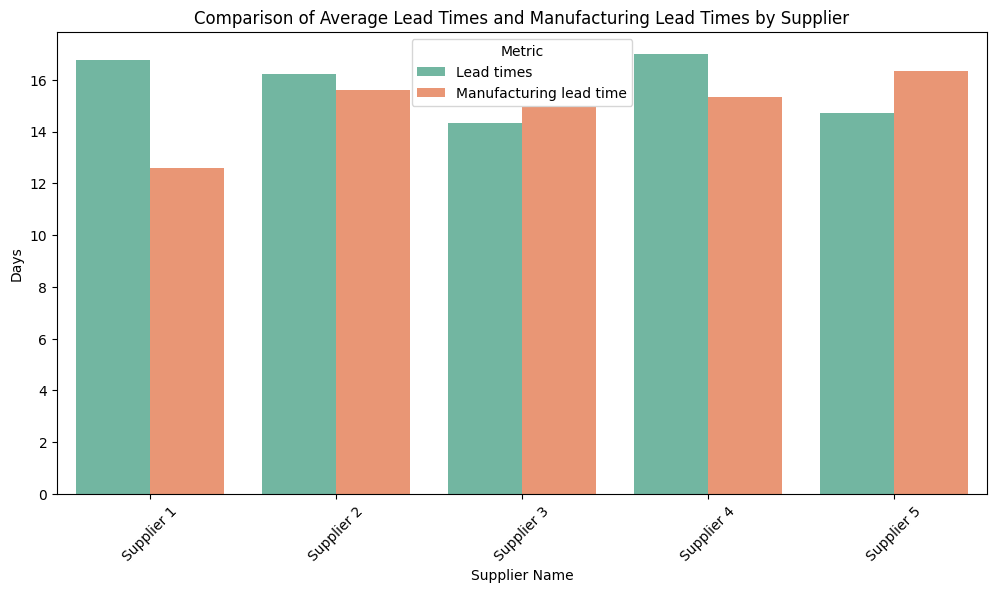

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv(r"C:\Users\sekha\Downloads\supply_chain_data.csv")

# Group the data by supplier and calculate average lead times and manufacturing lead times
supplier_performance = data.groupby('Supplier name').agg({
    'Lead times': 'mean',
    'Manufacturing lead time': 'mean'
}).reset_index()

# Create a multi-bar chart
plt.figure(figsize=(12, 6))
# Change 'variable' to 'Metric' in the hue parameter
sns.barplot(x='Supplier name', y='value', hue='Metric', data=supplier_performance.melt(id_vars='Supplier name', var_name='Metric', value_name='value'), palette='Set2')
plt.title('Comparison of Average Lead Times and Manufacturing Lead Times by Supplier')
plt.xlabel('Supplier Name')
plt.ylabel('Days')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.show()

# Logistics Optimization Study

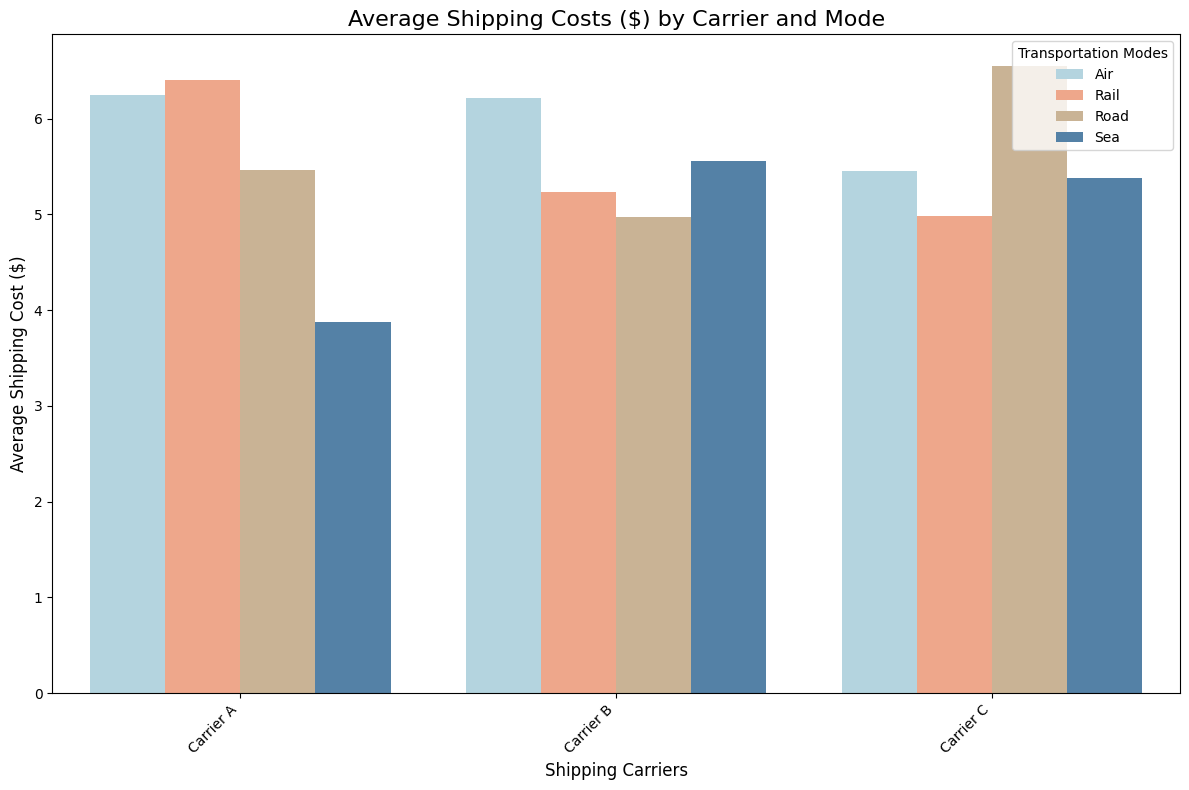

In [19]:
# Average Shipping Costs by Carrier and Mode
carrier_mode_cost_analysis = (
    data.groupby(["Shipping carriers", "Transportation modes"], as_index=False)
    .agg(Average_Shipping_Cost=("Shipping costs", "mean"))
)

# Define custom colors for transportation modes
colour_mode = {
    "Air": "lightblue",
    "Rail": "lightsalmon",
    "Road": "tan",
    "Sea": "steelblue",
}

# Create bar chart for average shipping costs
plt.figure(figsize=(12, 8))
sns.barplot(
    data=carrier_mode_cost_analysis,
    x="Shipping carriers",
    y="Average_Shipping_Cost",
    hue="Transportation modes",
    palette=colour_mode,
)

# Customize the plot
plt.title("Average Shipping Costs ($) by Carrier and Mode", fontsize=16)
plt.xlabel("Shipping Carriers", fontsize=12)
plt.ylabel("Average Shipping Cost ($)", fontsize=12)
plt.legend(title="Transportation Modes")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Show the plot
plt.show()

In [21]:
# Summary of transportation modes and routes
mode_route_summary = (
    data.groupby(["Transportation modes", "Routes"], as_index=False)
    .agg(
        Total_Costs=("Costs", "sum"),
        Average_Costs=("Costs", "mean"),
        Count=("Costs", "size"),
    )
)

# View the summary
print(mode_route_summary)

   Transportation modes   Routes  Total_Costs  Average_Costs  Count
0                   Air  Route A  5800.887460     527.353405     11
1                   Air  Route B  4464.858025     637.836861      7
2                   Air  Route C  4338.782012     542.347752      8
3                  Rail  Route A  6790.710511     485.050751     14
4                  Rail  Route B  7007.410741     637.037340     11
5                  Rail  Route C  1370.810306     456.936769      3
6                  Road  Route A  5934.412107     539.492010     11
7                  Road  Route B  7181.085147     552.391165     13
8                  Road  Route C  2932.696386     586.539277      5
9                   Sea  Route A  2349.764416     335.680631      7
10                  Sea  Route B  3386.030113     564.338352      6
11                  Sea  Route C  1367.130992     341.782748      4


# Costs by Route and Mode

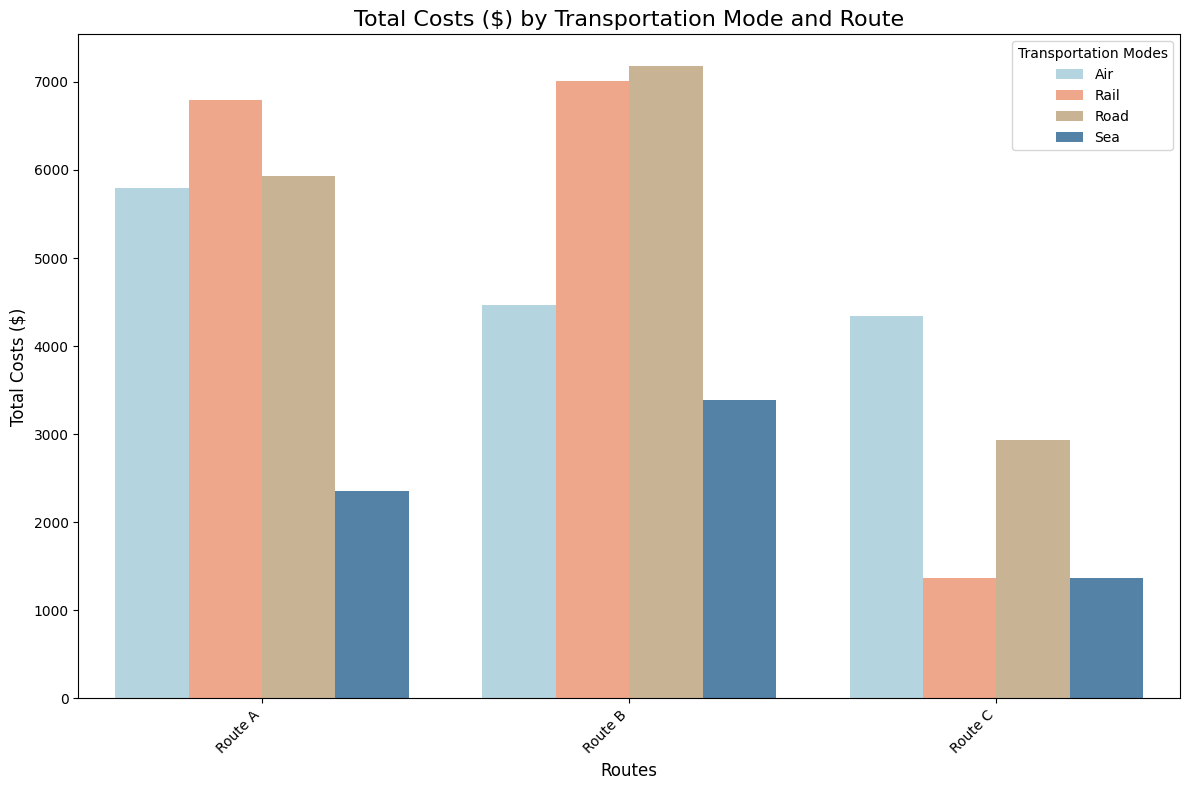

In [24]:
# Summary of transportation modes and routes
mode_route_summary = (
    data.groupby(["Transportation modes", "Routes"], as_index=False)
    .agg(Total_Costs=("Costs", "sum"))
)

# Define custom colors for transportation modes
colour_mode_darker = {
    "Air": "lightblue",
    "Rail": "lightsalmon",
    "Road": "tan",
    "Sea": "steelblue",
}

# Create bar chart for Costs by Route and Mode
plt.figure(figsize=(12, 8))
sns.barplot(
    data=mode_route_summary,
    x="Routes",
    y="Total_Costs",
    hue="Transportation modes",
    palette=colour_mode_darker,
)

# Customize the plot
plt.title("Total Costs ($) by Transportation Mode and Route", fontsize=16)
plt.xlabel("Routes", fontsize=12)
plt.ylabel("Total Costs ($)", fontsize=12)
plt.legend(title="Transportation Modes")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Show the plot
plt.show()

### Efficiency Analysis by Route

Efficiency Score is defined as the number of shipments divided by the average cost, higher score indicates more shipments for each unit of cost, reflecting higher efficiency.

In [28]:
# Efficiency Analysis by Route
efficiency_analysis = (
    data.groupby("Routes", as_index=False)
    .agg(
        Average_Cost=("Costs", "mean"),
        Shipments=("Costs", "size"),  # Count the number of shipments
    )
)

# Calculate Efficiency Score
efficiency_analysis["Efficiency_Score"] = (
    efficiency_analysis["Shipments"] / efficiency_analysis["Average_Cost"]
)

# View the efficiency analysis
print(efficiency_analysis)


    Routes  Average_Cost  Shipments  Efficiency_Score
0  Route A    485.483128         43          0.088572
1  Route B    595.659028         37          0.062116
2  Route C    500.470985         20          0.039962


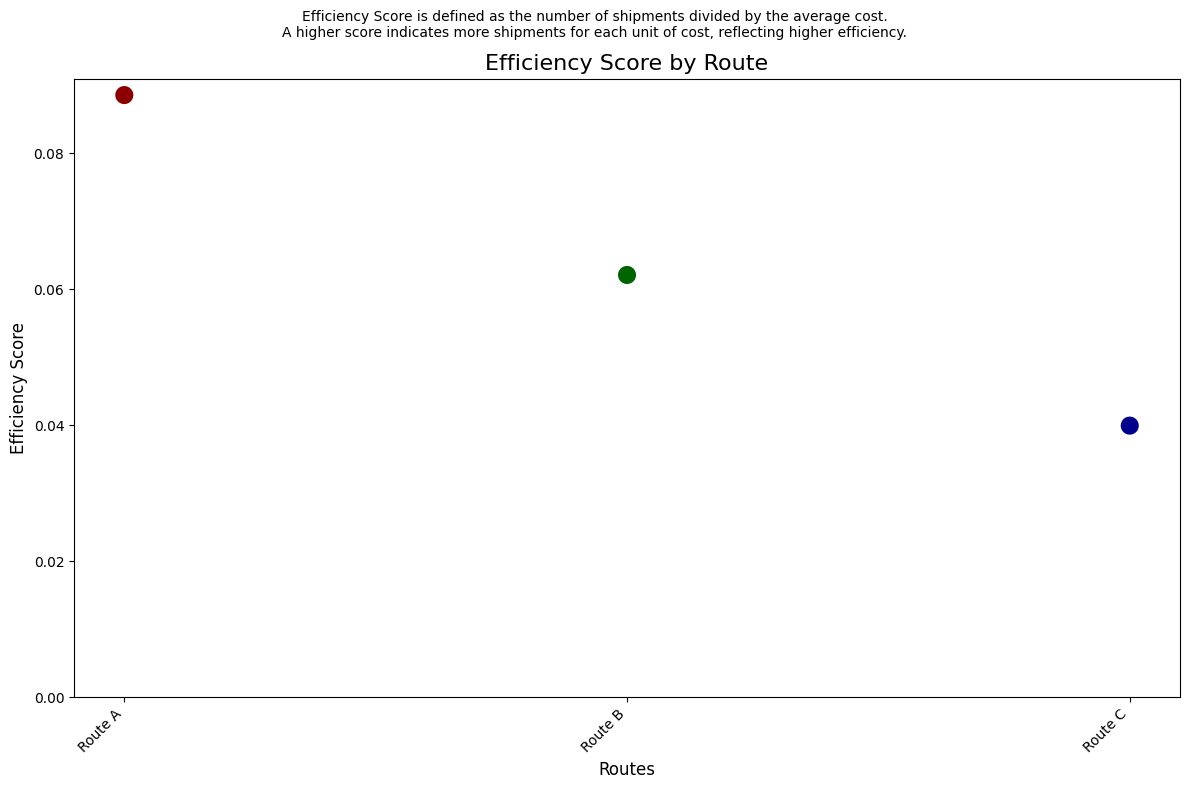

In [30]:
# Efficiency Analysis by Route
efficiency_analysis = (
    data.groupby("Routes", as_index=False)
    .agg(
        Average_Cost=("Costs", "mean"),
        Shipments=("Costs", "size"),  # Count the number of shipments
    )
)

# Calculate Efficiency Score
efficiency_analysis["Efficiency_Score"] = (
    efficiency_analysis["Shipments"] / efficiency_analysis["Average_Cost"]
)

# Define custom colors for Routes (adjust as needed)
route_colors = ["darkred", "darkgreen", "darkblue"]

# Create scatter plot for Efficiency Score by Route
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=efficiency_analysis,
    x="Routes",
    y="Efficiency_Score",
    hue="Routes",
    palette=route_colors,
    s=200,  # Adjust size of points
    legend=False  # Remove legend
)

# Customize the plot
plt.title("Efficiency Score by Route", fontsize=16)
plt.suptitle(
    "Efficiency Score is defined as the number of shipments divided by the average cost.\nA higher score indicates more shipments for each unit of cost, reflecting higher efficiency.",
    fontsize=10,
)
plt.xlabel("Routes", fontsize=12)
plt.ylabel("Efficiency Score", fontsize=12)
plt.ylim(0, None)  # Set y-axis to start from 0
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Show the plot
plt.show()

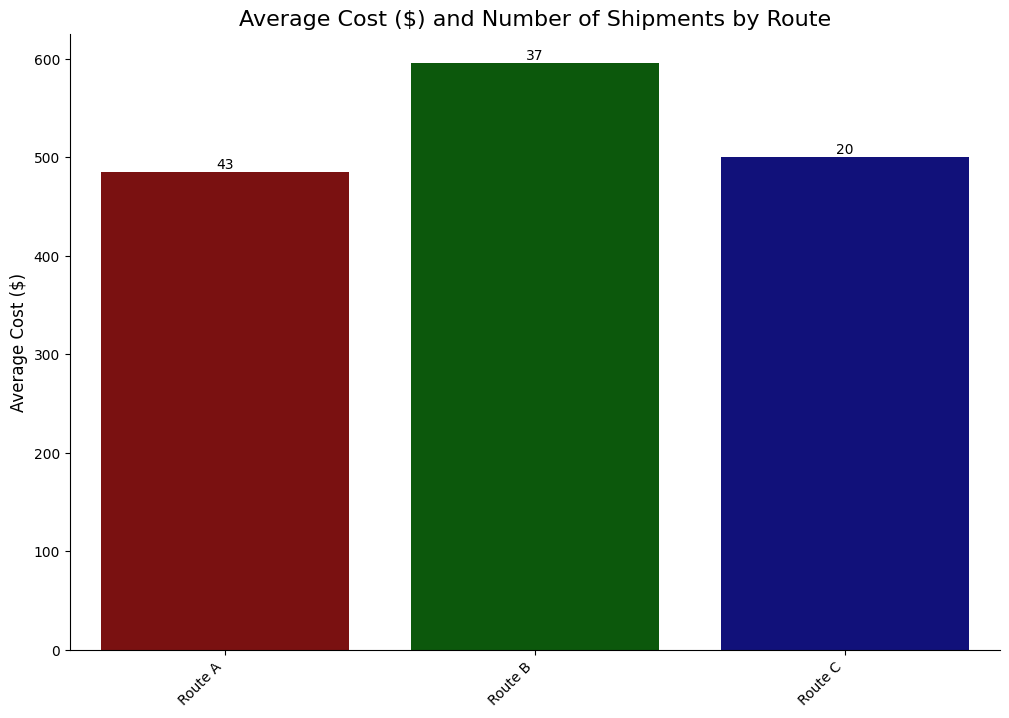

In [32]:
# Efficiency Analysis by Route
efficiency_analysis = (
    data.groupby("Routes", as_index=False)
    .agg(
        Average_Cost=("Costs", "mean"),
        Shipments=("Costs", "size"),  # Count the number of shipments
    )
)

# Add a "Routes" column as the hue for coloring
efficiency_analysis["Routes_Color"] = efficiency_analysis["Routes"]

# Define custom colors for Routes
route_colors = {"Route A": "darkred", "Route B": "darkgreen", "Route C": "darkblue"}

# Create bar chart for Average Cost and Shipments by Route
plt.figure(figsize=(12, 8))
bars = sns.barplot(
    data=efficiency_analysis,
    x="Routes",
    y="Average_Cost",
    hue="Routes_Color",
    palette=route_colors,
    dodge=False,  # Ensures no grouping as it's a single series
    legend=False  # Turn off the legend since it's redundant
)

# Add text annotations for shipments
for i, bar in enumerate(bars.patches):
    # Get the height (y-value) of each bar
    bar_height = bar.get_height()
    # Annotate with the number of shipments
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-coordinate of the bar center
        bar_height + 0.2,  # Slightly above the bar
        f"{efficiency_analysis['Shipments'][i]}",  # Text (Shipments count)
        ha="center",  # Center alignment
        va="bottom",
        fontsize=10,
    )

# Customize the plot
plt.title("Average Cost ($) and Number of Shipments by Route", fontsize=16)
plt.xlabel("")
plt.ylabel("Average Cost ($)", fontsize=12)
plt.ylim(0, None)  # Start y-axis from 0
plt.xticks(rotation=45, ha="right")
sns.despine()  # Remove the top and right spines

# Show the plot
plt.show()

In [34]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load the data
data = pd.read_csv(r"C:\Users\sekha\Downloads\supply_chain_data.csv")

# List of categorical variables (replace with the appropriate column names from your dataset)
categorical_variables = ['Product type', 'Availability', 'Customer demographics',
                         'Shipping carriers', 'Supplier name', 'Location',
                         'Transportation modes', 'Routes']  # List of categorical columns

# Dictionary to store chi-square results
chi_square_results = {}

# Perform chi-square test for each categorical variable
for col in categorical_variables:
    # Create a contingency table between the categorical variable and another categorical column
    # Replace 'Shipping carriers' with the column you want to test against
    contingency_table = pd.crosstab(data[col], data['Shipping carriers'])  # Example with 'Shipping carriers' column

    # Perform the chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Store the results
    chi_square_results[col] = {'chi2_statistic': chi2, 'p_value': p}

# Print the results
print("\nCategorical Variable Analysis (Chi-square test):")
for col, result in chi_square_results.items():
    print(f"\n{col}:")
    print("Chi-square Statistic:", result['chi2_statistic'])
    print("p-value:", result['p_value'])



Categorical Variable Analysis (Chi-square test):

Product type:
Chi-square Statistic: 6.265831790738626
p-value: 0.18015589680335498

Availability:
Chi-square Statistic: 132.26744186046514
p-value: 0.2891501831636821

Customer demographics:
Chi-square Statistic: 3.7144861284929287
p-value: 0.7152485558929267

Shipping carriers:
Chi-square Statistic: 200.0
p-value: 3.75727673578106e-42

Supplier name:
Chi-square Statistic: 7.938603393695616
p-value: 0.43949044460342135

Location:
Chi-square Statistic: 5.025175572890086
p-value: 0.7548819740396685

Transportation modes:
Chi-square Statistic: 10.179724900155355
p-value: 0.11728461162614505

Routes:
Chi-square Statistic: 3.3590871301143395
p-value: 0.4996251825458988


In [36]:
import pandas as pd
import pulp

# Sample Data (Replace with your actual data)
mock_data = pd.DataFrame({
    'SKU': ['Product1', 'Product2', 'Product3'],
    'Shipping costs': [5, 3, 8],
    'Shipping times': [2, 4, 3],
    'Order quantities': [10, 5, 15]
})

# Define Problem
prob = pulp.LpProblem("ShippingOptimization", pulp.LpMinimize)

# Define Decision Variables
order_vars = [pulp.LpVariable(f"Order_{i}", cat='Binary') for i in range(len(mock_data))]

# Objective Function: Minimize the total shipping cost
prob += pulp.lpSum([mock_data['Shipping costs'][i] * order_vars[i] for i in range(len(mock_data))]), "TotalShippingCost"

# Constraints
# Constraint 1: Total Shipping cost <= 1000 (for example)
prob += pulp.lpSum([mock_data['Shipping costs'][i] * order_vars[i] for i in range(len(mock_data))]) <= 1000, "MaxShippingCost"

# Constraint 2: Some other constraints can be added based on your requirements
# For example: Ensure at least one product is ordered
prob += pulp.lpSum(order_vars) >= 1, "MinProductsOrdered"

# Solve the Problem
prob.solve()

# Check solver status
if pulp.LpStatus[prob.status] != 'Optimal':
    print(f"Solver Status: {pulp.LpStatus[prob.status]}")
    print("Solver messages:", prob.solver.messages)

# Print Decision Variable Results (Check if any products are ordered)
for var in order_vars:
    print(f"{var.name}: {var.varValue}")

# Print the total shipping cost (should not be 0 if products are ordered)
total_shipping_cost = pulp.value(prob.objective)
print(f"Total Shipping Cost: {total_shipping_cost}")


Order_0: 0.0
Order_1: 1.0
Order_2: 0.0
Total Shipping Cost: 3.0


# Demand Forecasting & Inventory Optimization (Predictive)

C:\Users\sekha\AppData\Local\Temp\ipykernel_13408\1748978855.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Customer demographics'] = label_encoder.fit_transform(X['Customer demographics'])


Mean Absolute Error: 320.86937917073567


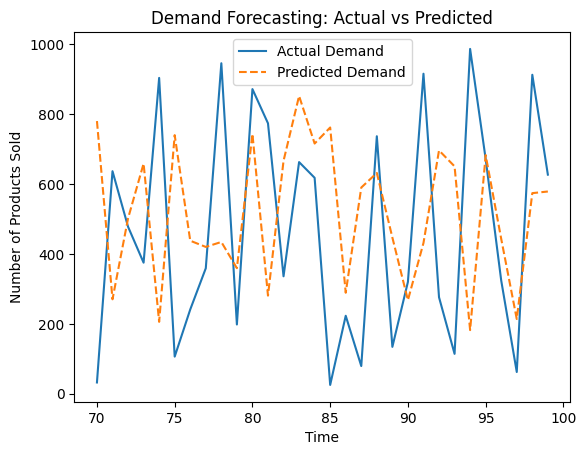

Optimal Order Quantities:
Order_0 = 725.43738
Order_1 = 215.17093
Order_10 = 688.65729
Order_11 = 225.70154
Order_12 = 611.5144
Order_13 = 797.24255
Order_14 = 661.11597
Order_15 = 707.05359
Order_16 = 233.94589
Order_17 = 535.10535
Order_18 = 576.86951
Order_19 = 391.96286
Order_2 = 446.733
Order_20 = 212.74057
Order_21 = 376.34854
Order_22 = 641.39227
Order_23 = 595.8266
Order_24 = 126.97304
Order_25 = 628.01556
Order_26 = 388.1788
Order_27 = 158.77715
Order_28 = 519.09363
Order_29 = 523.77881
Order_3 = 603.73187
Order_4 = 150.61705
Order_5 = 685.13361
Order_6 = 382.82596
Order_7 = 365.07959
Order_8 = 379.3121
Order_9 = 304.27197
Total Order Quantity: 13858.607380000001


In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import pulp
from sklearn.metrics import mean_absolute_error
from datetime import datetime
from sklearn.preprocessing import LabelEncoder

# Load Data
data = pd.read_csv(r"C:\Users\sekha\Downloads\supply_chain_data.csv")

if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  # Parse Date if exists
data.dropna(inplace=True)  # Drop rows with NaN values

if 'Date' in data.columns and data['Date'].dtype == 'datetime64[ns]':
    data['Year'] = data['Date'].dt.year
    data['Month'] = data['Date'].dt.month
    data['Day'] = data['Date'].dt.day

# Set features and target
features = ['Price', 'Availability', 'Revenue generated', 'Customer demographics', 'Stock levels', 'Shipping times', 'Shipping costs']
target = 'Number of products sold'

# Prepare data for forecasting
X = data[features]
y = data[target]

# Convert 'Customer demographics' to numerical using Label Encoding
label_encoder = LabelEncoder()
X['Customer demographics'] = label_encoder.fit_transform(X['Customer demographics'])

# Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

# Demand Forecasting using XGBoost
model = XGBRegressor(objective='reg:squarederror', n_estimators=1000, max_depth=6)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate Model Performance (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Plot Predicted vs Actual Demand
plt.plot(y_test.index, y_test.values, label="Actual Demand")
plt.plot(y_test.index, y_pred, label="Predicted Demand", linestyle='dashed')
plt.legend()
plt.title("Demand Forecasting: Actual vs Predicted")
plt.xlabel("Time")
plt.ylabel("Number of Products Sold")
plt.show()

# ---- Inventory Optimization using Linear Programming ----

# Define Inventory Optimization Problem
# Assume we have stock levels, forecasted demand, and lead time in the data

# Set up the decision variables for how much inventory to order
if 'Stock levels' in data.columns:
    stock_levels = data['Stock levels'].iloc[-1]  # Use last available stock levels
else:
    stock_levels = 0  # Default to 0 if stock levels are not available

forecasted_demand = y_pred  # Forecasted demand from XGBoost model

# Create decision variables for order quantities for each product
order_vars = pulp.LpVariable.dicts("Order", range(len(forecasted_demand)), lowBound=0, cat='Continuous')

# Define the linear programming problem
prob = pulp.LpProblem("Inventory_Optimization", pulp.LpMinimize)

# Objective: Minimize the total order quantity needed to meet demand
prob += pulp.lpSum(order_vars[i] for i in range(len(forecasted_demand))), "Total Order Quantity"

# Constraints: Order quantity should meet or exceed the forecasted demand (taking into account lead time)
for i in range(len(forecasted_demand)):
    prob += order_vars[i] + stock_levels >= forecasted_demand[i], f"Demand_Constraint_{i}"

# Solve the optimization problem
prob.solve()

# Check solver status
if pulp.LpStatus[prob.status] == "Optimal":
    # Print optimal order quantities
    print("Optimal Order Quantities:")
    for v in prob.variables():
        print(v.name, "=", v.varValue)

    # Print total order quantity
    print("Total Order Quantity:", pulp.value(prob.objective))
else:
    print("Solver did not find an optimal solution.")


# Supply Chain & Shipping Cost Optimization (Prescriptive)

In [42]:
import pandas as pd
import pulp
import numpy as np

# Load Data (Make sure to adjust the path to your dataset)
data = pd.read_csv(r"C:\Users\sekha\Downloads\supply_chain_data.csv")

# **Check if 'Number of products sold' column exists for demand**
demand_column = 'Number of products sold'  # Based on your provided column name

# Define the Suppliers, Customers (locations), and transportation costs
suppliers = data['Supplier name'].unique()
locations = data['Location'].unique()

# For simplicity, let's assume shipping costs and stock levels are available in the dataset
# Create a cost matrix (random values for the sake of this example)
cost_matrix = pd.DataFrame(np.random.rand(len(suppliers), len(locations)) * 100,
                           index=suppliers, columns=locations)

# Assume we have stock levels and demands (these should come from your dataset)
stock_levels = data.groupby('Supplier name')['Stock levels'].sum().to_dict()  # Total stock by supplier
customer_demand = data.groupby('Location')[demand_column].sum().to_dict()  # Total demand by location

# Define Linear Programming Variables for shipping quantities from suppliers to customers
shipping_vars = pulp.LpVariable.dicts("Ship",
                                     [(supplier, location) for supplier in suppliers for location in locations],
                                     lowBound=0, cat='Continuous')

# Define the Linear Programming problem
prob = pulp.LpProblem("Shipping_Cost_Optimization", pulp.LpMinimize)

# Objective: Minimize the total shipping cost
prob += pulp.lpSum(shipping_vars[supplier, location] * cost_matrix.loc[supplier, location]
                   for supplier in suppliers for location in locations), "Total Shipping Cost"

# Constraints:

# 1. Meet customer demand (customer demand should be fulfilled)
for location in locations:
    prob += pulp.lpSum(shipping_vars[supplier, location] for supplier in suppliers) >= customer_demand[location], f"Demand_{location}"

# 2. Do not exceed supplier stock levels
for supplier in suppliers:
    prob += pulp.lpSum(shipping_vars[supplier, location] for location in locations) <= stock_levels[supplier], f"Stock_{supplier}"

# 3. If there is no shipping, the variable should be zero
# This constraint is automatically handled by the decision variable having a lower bound of 0.

# Solve the optimization problem
prob.solve()

# Check if the solution is optimal and display the results
if pulp.LpStatus[prob.status] == "Optimal":
    print("Optimal Shipping Plan Found:")

    # Print the optimal shipping quantities from suppliers to customers
    for supplier in suppliers:
        for location in locations:
            quantity_shipped = shipping_vars[supplier, location].varValue
            if quantity_shipped > 0:  # Display only the quantities that are actually shipped
                print(f"Ship {quantity_shipped} units from {supplier} to {location}")

    # Print total shipping cost
    print(f"Total Shipping Cost: {pulp.value(prob.objective)}")
else:
    print("No optimal solution found.")


No optimal solution found.


In [44]:
# Check if total demand is less than total stock
total_demand = sum(customer_demand.values())
total_stock = sum(stock_levels.values())
print(f"Total Demand: {total_demand}, Total Stock: {total_stock}")

# Check if there are any zero or negative shipping costs
print("Shipping Cost Matrix:")
print(cost_matrix)

# Check stock levels and customer demands by location
print("Stock Levels:", stock_levels)
print("Customer Demand:", customer_demand)

# Check solver status after running
print(f"Solver Status: {pulp.LpStatus[prob.status]}")

# Print more information if the solution is infeasible
if pulp.LpStatus[prob.status] == "Infeasible":
    print("Infeasible solution, check constraints and data integrity.")


Total Demand: 46099, Total Stock: 4777
Shipping Cost Matrix:
               Mumbai    Kolkata      Delhi  Bangalore    Chennai
Supplier 3  88.278543  53.303220  80.953339   0.947369  66.467117
Supplier 1  90.842772  95.384842  30.208228   9.194288  85.221466
Supplier 5  56.012139  55.211046  14.334116  42.785958  59.238330
Supplier 4   9.164114  11.879648  42.542959   3.751138  22.461809
Supplier 2   9.944297  15.125690  39.114881   5.411768  29.211521
Stock Levels: {'Supplier 1': 1142, 'Supplier 2': 1022, 'Supplier 3': 654, 'Supplier 4': 1061, 'Supplier 5': 898}
Customer Demand: {'Bangalore': 5420, 'Chennai': 8768, 'Delhi': 9715, 'Kolkata': 12770, 'Mumbai': 9426}
Solver Status: Infeasible
Infeasible solution, check constraints and data integrity.


In [46]:
import pandas as pd
import pulp
import numpy as np

# Load Data (Make sure to adjust the path to your dataset)
data = pd.read_csv(r"C:\Users\sekha\Downloads\supply_chain_data.csv")

# **Check if 'Demand' column exists. If not, use 'Number of products sold' instead.**
if 'Demand' not in data.columns:
    demand_column = 'Number of products sold'
else:
    demand_column = 'Demand'

# Define the Suppliers, Customers (locations), and transportation costs
suppliers = data['Supplier name'].unique()
locations = data['Location'].unique()

# For simplicity, let's assume shipping costs and stock levels are available in the dataset
# Create a cost matrix (random values for the sake of this example)
cost_matrix = pd.DataFrame(np.random.rand(len(suppliers), len(locations)) * 100,
                           index=suppliers, columns=locations)

# Assume we have stock levels and demands (these should come from your dataset)
stock_levels = data.groupby('Supplier name')['Stock levels'].sum().to_dict()  # Total stock by supplier
customer_demand = data.groupby('Location')[demand_column].sum().to_dict()  # Total demand by location

# Check total stock and demand for sanity check
total_stock = sum(stock_levels.values())
total_demand = sum(customer_demand.values())
print(f"Total Demand: {total_demand}, Total Stock: {total_stock}")

# Define Linear Programming Variables for shipping quantities from suppliers to customers
shipping_vars = pulp.LpVariable.dicts("Ship",
                                     [(supplier, location) for supplier in suppliers for location in locations],
                                     lowBound=0, cat='Continuous')

# Define the Linear Programming problem
prob = pulp.LpProblem("Shipping_Cost_Optimization", pulp.LpMinimize)

# Objective: Minimize the total shipping cost
prob += pulp.lpSum(shipping_vars[supplier, location] * cost_matrix.loc[supplier, location]
                   for supplier in suppliers for location in locations), "Total Shipping Cost"

# Constraints:

# 1. Meet customer demand (allow partial fulfillment, for example 80% of demand)
for location in locations:
    prob += pulp.lpSum(shipping_vars[supplier, location] for supplier in suppliers) >= customer_demand[location] * 0.8, f"Demand_{location}"

# 2. Do not exceed supplier stock levels
for supplier in suppliers:
    prob += pulp.lpSum(shipping_vars[supplier, location] for location in locations) <= stock_levels[supplier], f"Stock_{supplier}"

# 3. If there is no shipping, the variable should be zero
# This constraint is automatically handled by the decision variable having a lower bound of 0.

# Solve the optimization problem
prob.solve()

# Check if the solution is optimal and display the results
if pulp.LpStatus[prob.status] == "Optimal":
    print("Optimal Shipping Plan Found:")

    # Print the optimal shipping quantities from suppliers to customers
    for supplier in suppliers:
        for location in locations:
            quantity_shipped = shipping_vars[supplier, location].varValue
            if quantity_shipped > 0:  # Display only the quantities that are actually shipped
                print(f"Ship {quantity_shipped} units from {supplier} to {location}")

    # Print total shipping cost
    print(f"Total Shipping Cost: {pulp.value(prob.objective)}")
else:
    print("No optimal solution found.")


Total Demand: 46099, Total Stock: 4777
No optimal solution found.


# Production Scheduling & Route Optimization (Prescriptive)

In [51]:
import pandas as pd
import pulp
import numpy as np

# Sample data - Modify with your actual data
products = ['Product_A', 'Product_B', 'Product_C']
factories = ['Factory_1', 'Factory_2']
locations = ['Location_1', 'Location_2', 'Location_3']

# Sample production rates and times (modify as needed)
production_rates = {'Product_A': 20, 'Product_B': 15, 'Product_C': 25}
production_times = {'Product_A': 5, 'Product_B': 3, 'Product_C': 4}

# Sample available machine hours per factory (modify as needed)
available_machine_hours = {'Factory_1': 120, 'Factory_2': 100}

# Sample demand data (modify as needed)
demand = {'Product_A': {'Location_1': 30, 'Location_2': 40, 'Location_3': 50},
          'Product_B': {'Location_1': 20, 'Location_2': 30, 'Location_3': 40},
          'Product_C': {'Location_1': 10, 'Location_2': 20, 'Location_3': 30}}

# Delivery cost data (random for the sake of the example)
delivery_costs = pd.DataFrame(np.random.rand(len(factories), len(locations)) * 100,
                              index=factories, columns=locations)

# Initialize Linear Program
prob = pulp.LpProblem("Production_and_Route_Optimization", pulp.LpMinimize)

# Production variables
production_vars = pulp.LpVariable.dicts("Produce",
                                       [(product, factory) for product in products for factory in factories],
                                       lowBound=0, cat='Continuous')

# Delivery variables
delivery_vars = pulp.LpVariable.dicts("Deliver",
                                     [(product, factory, location) for product in products for factory in factories for location in locations],
                                     lowBound=0, cat='Continuous')

# Objective: Minimize total production and delivery cost
prob += pulp.lpSum(production_vars[product, factory] * production_times[product] * available_machine_hours[factory]
                   for product in products for factory in factories) + \
         pulp.lpSum(delivery_vars[product, factory, location] * delivery_costs.loc[factory, location]
                    for product in products for factory in factories for location in locations), "Total Cost"

# Constraints:

# Meet demand for each product at each location
for product in products:
    for location in locations:
        prob += pulp.lpSum(delivery_vars[product, factory, location] for factory in factories) == demand[product][location], f"Demand_{product}_{location}"

# Meet production capacity at each factory (based on available machine hours)
for factory in factories:
    for product in products:
        prob += production_vars[product, factory] * production_times[product] <= available_machine_hours[factory], f"ProductionCapacity_{product}_{factory}"

# Ensure production meets the required number of products for delivery
for product in products:
    for factory in factories:
        prob += production_vars[product, factory] == pulp.lpSum(delivery_vars[product, factory, location] for location in locations), f"ProductionEqualsDelivery_{product}_{factory}"

# Debugging: Print some details to verify if constraints are feasible
print(f"Total demand for all products: {sum([sum(demand[product].values()) for product in demand])}")
print(f"Total production capacity available: {sum(available_machine_hours.values())}")

# Solve the optimization problem
prob.solve()

# Check the solution status and print the results
if pulp.LpStatus[prob.status] == "Optimal":
    print("Optimal Production and Delivery Plan Found:")

    # Print the optimal production schedule
    for product in products:
        for factory in factories:
            quantity_produced = production_vars[product, factory].varValue
            if quantity_produced > 0:
                print(f"Produce {quantity_produced} units of {product} at {factory}")

    # Print the optimal delivery plan
    for product in products:
        for factory in factories:
            for location in locations:
                quantity_delivered = delivery_vars[product, factory, location].varValue
                if quantity_delivered > 0:
                    print(f"Deliver {quantity_delivered} units of {product} from {factory} to {location}")

    # Print the total cost
    print(f"Total Production and Delivery Cost: {pulp.value(prob.objective)}")
else:
    print("No optimal solution found.")


Total demand for all products: 270
Total production capacity available: 220
No optimal solution found.


In [53]:
import pandas as pd
import pulp
import numpy as np

# Sample data - Modify with your actual data
products = ['Product_A', 'Product_B', 'Product_C']
factories = ['Factory_1', 'Factory_2']
locations = ['Location_1', 'Location_2', 'Location_3']

# Sample production rates and times (modify as needed)
production_rates = {'Product_A': 20, 'Product_B': 15, 'Product_C': 25}
production_times = {'Product_A': 5, 'Product_B': 3, 'Product_C': 4}

# Sample available machine hours per factory (modify as needed)
available_machine_hours = {'Factory_1': 120, 'Factory_2': 100}

# Sample demand data (modify as needed)
demand = {'Product_A': {'Location_1': 30, 'Location_2': 40, 'Location_3': 50},
          'Product_B': {'Location_1': 20, 'Location_2': 30, 'Location_3': 40},
          'Product_C': {'Location_1': 10, 'Location_2': 20, 'Location_3': 30}}

# Delivery cost data (random for the sake of the example)
delivery_costs = pd.DataFrame(np.random.rand(len(factories), len(locations)) * 100,
                              index=factories, columns=locations)

# Penalty for unmet demand (set a cost for not fulfilling the demand)
penalty_cost = 100  # Penalty per unit of unmet demand

# Initialize Linear Program
prob = pulp.LpProblem("Production_and_Route_Optimization", pulp.LpMinimize)

# Production variables
production_vars = pulp.LpVariable.dicts("Produce",
                                       [(product, factory) for product in products for factory in factories],
                                       lowBound=0, cat='Continuous')

# Delivery variables
delivery_vars = pulp.LpVariable.dicts("Deliver",
                                     [(product, factory, location) for product in products for factory in factories for location in locations],
                                     lowBound=0, cat='Continuous')

# Unmet demand variables (we will add this to account for the penalty)
unmet_demand_vars = pulp.LpVariable.dicts("UnmetDemand",
                                          [(product, location) for product in products for location in locations],
                                          lowBound=0, cat='Continuous')

# Objective: Minimize total production and delivery cost plus penalty for unmet demand
prob += pulp.lpSum(production_vars[product, factory] * production_times[product] * available_machine_hours[factory]
                   for product in products for factory in factories) + \
         pulp.lpSum(delivery_vars[product, factory, location] * delivery_costs.loc[factory, location]
                    for product in products for factory in factories for location in locations) + \
         pulp.lpSum(unmet_demand_vars[product, location] * penalty_cost
                    for product in products for location in locations), "Total Cost"

# Constraints:

# Meet demand for each product at each location or incur a penalty
for product in products:
    for location in locations:
        prob += pulp.lpSum(delivery_vars[product, factory, location] for factory in factories) + unmet_demand_vars[product, location] == demand[product][location], f"Demand_{product}_{location}"

# Meet production capacity at each factory (based on available machine hours)
for factory in factories:
    for product in products:
        prob += production_vars[product, factory] * production_times[product] <= available_machine_hours[factory], f"ProductionCapacity_{product}_{factory}"

# Ensure production meets the required number of products for delivery
for product in products:
    for factory in factories:
        prob += production_vars[product, factory] == pulp.lpSum(delivery_vars[product, factory, location] for location in locations), f"ProductionEqualsDelivery_{product}_{factory}"

# Debugging: Print some details to verify if constraints are feasible
print(f"Total demand for all products: {sum([sum(demand[product].values()) for product in demand])}")
print(f"Total production capacity available: {sum(available_machine_hours.values())}")

# Solve the optimization problem
prob.solve()

# Check the solution status and print the results
if pulp.LpStatus[prob.status] == "Optimal":
    print("Optimal Production and Delivery Plan Found:")

    # Print the optimal production schedule
    for product in products:
        for factory in factories:
            quantity_produced = production_vars[product, factory].varValue
            if quantity_produced > 0:
                print(f"Produce {quantity_produced} units of {product} at {factory}")

    # Print the optimal delivery plan
    for product in products:
        for factory in factories:
            for location in locations:
                quantity_delivered = delivery_vars[product, factory, location].varValue
                if quantity_delivered > 0:
                    print(f"Deliver {quantity_delivered} units of {product} from {factory} to {location}")

    # Print the unmet demand and associated penalty
    for product in products:
        for location in locations:
            unmet_quantity = unmet_demand_vars[product, location].varValue
            if unmet_quantity > 0:
                print(f"Unmet demand for {product} at {location}: {unmet_quantity} units")

    # Print the total cost
    print(f"Total Production and Delivery Cost: {pulp.value(prob.objective)}")
else:
    print("No optimal solution found.")


Total demand for all products: 270
Total production capacity available: 220
Optimal Production and Delivery Plan Found:
Unmet demand for Product_A at Location_1: 30.0 units
Unmet demand for Product_A at Location_2: 40.0 units
Unmet demand for Product_A at Location_3: 50.0 units
Unmet demand for Product_B at Location_1: 20.0 units
Unmet demand for Product_B at Location_2: 30.0 units
Unmet demand for Product_B at Location_3: 40.0 units
Unmet demand for Product_C at Location_1: 10.0 units
Unmet demand for Product_C at Location_2: 20.0 units
Unmet demand for Product_C at Location_3: 30.0 units
Total Production and Delivery Cost: 27000.0


# Defect Prediction & Supplier Performance Evaluation (Predictive)

In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv(r"C:\Users\sekha\Downloads\supply_chain_data.csv")

# Check for missing values in key columns
print(data.isnull().sum())  # Check for missing values

# Fill missing values if needed (example: fill with the mean for numeric columns)
data['Defect rates'] = data['Defect rates'].fillna(data['Defect rates'].mean())  # Avoid using inplace=True

# Feature Engineering: Prepare features for the defect prediction model
features = ['Price', 'Stock levels', 'Lead times', 'Order quantities', 'Shipping times', 'Shipping costs',
            'Production volumes', 'Manufacturing lead time', 'Manufacturing costs', 'Transportation modes']

# Check if 'Transportation modes' exists and handle it if necessary
if 'Transportation modes' not in data.columns:
    features.remove('Transportation modes')

# Define the features and target
X = data[features]
y = data['Defect rates']

# Convert categorical features into numeric (if any)
X = pd.get_dummies(X, drop_first=True)  # Convert categorical features into dummy variables if needed

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R²: {r2}")

# Add predicted defect rates to the dataset
data['Predicted Defect Rates'] = model.predict(scaler.transform(X))

# Evaluate Supplier Performance based on Predicted Defect Rates
supplier_performance = data.groupby('Supplier name').agg(
    predicted_defect_rate=('Predicted Defect Rates', 'mean'),
    actual_defect_rate=('Defect rates', 'mean')
).reset_index()

# Display Supplier Performance Evaluation
print(supplier_performance)


Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64
Mean Squared Error: 2.230125928610739
R²: -1.0275263466449673
  Supplier name  predicted_defect_rate  actual_defect_rate
0    Supplier 1               2.020077            1.803630
1    Supplier 2               2.412735            2.362750
2    Supplier 3               2.365433            2.

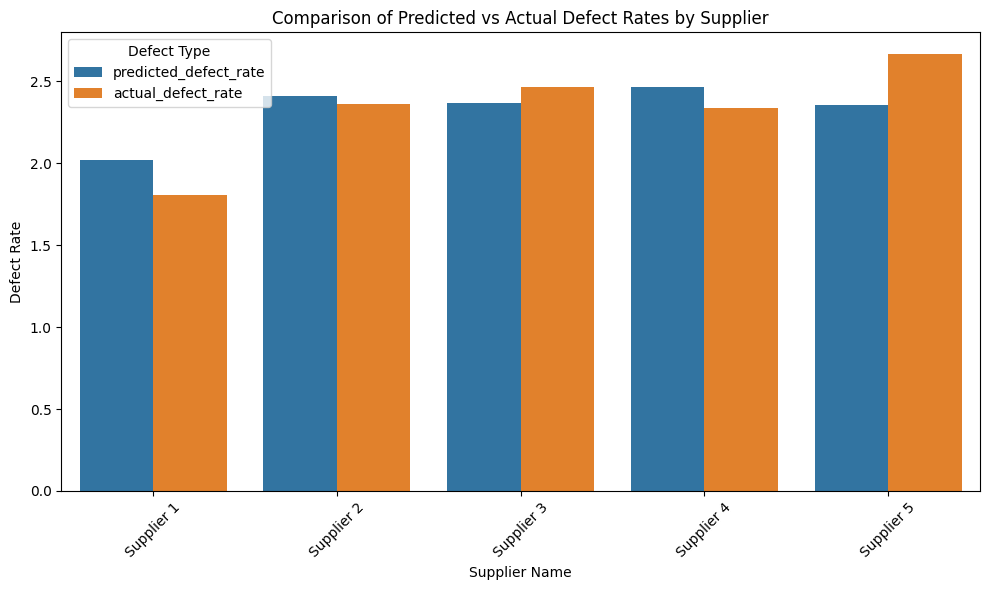

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'supplier_performance' DataFrame is already created
# Create a bar plot for predicted vs actual defect rates by supplier
plt.figure(figsize=(10, 6))

# Melt the data to make it suitable for seaborn
supplier_performance_melted = supplier_performance.melt(id_vars="Supplier name",
                                                         value_vars=["predicted_defect_rate", "actual_defect_rate"],
                                                         var_name="Defect Type", value_name="Defect Rate")

# Create the bar plot
sns.barplot(x="Supplier name", y="Defect Rate", hue="Defect Type", data=supplier_performance_melted)

# Customize the plot
plt.title('Comparison of Predicted vs Actual Defect Rates by Supplier')
plt.xlabel('Supplier Name')
plt.ylabel('Defect Rate')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


# B. Overall Analysis Completed:
The following analysis had been done in python using varies libraries or packages, wherever required.
1. EDA (Exploratory Data Analysis)
2. Demand Forecasting
3. Location rankings based on 'Product selling'
4. Average sales of each product type per location
5. Product types having more defect rates
6. Transportation cost
7. Lead times of each product type per supplier
8. Product and Customer Analysis
9. Predictive Analytics for Future Planning
10. Supply Chain Performance Evaluation
11. Supplier Assessment: suppliers based on Lead Times, Defect Rates, and Inspection Outcomes
12. Logistics Optimization Study
13. Demand Forecasting & Inventory Optimization (Predictive)
14. Supply Chain & Shipping Cost Optimization (Prescriptive)
15. Production Scheduling & Route Optimization (Prescriptive)
16. Defect Prediction & Supplier Performance Evaluation (Predictive)

This document provides a comprehensive analysis of supply chain metrics, demand forecasting, supplier performance, and logistics optimization. The insights aim to empower stakeholders to make data-driven decisions for improved operational performance and customer satisfaction.

 # C. Supply Chain Dataset Overview: Overall Insights from the Analysis
1. Dataset Composition
• 100 observations, with 24 features, encompassing various facets of the supply chain.
• Product types are categorized into three main groups:
o Skincare
o Haircare
o Cosmetics
• SKU price ranges from 1.69 to 99.17.
• There are no null values in the dataset.
• Gender data is missing for 31% of the observations.
2. Product Demand and Sales Insights
1. High-Demand Products
o Products are evaluated based on the "number of products sold" field.
o Kolkata emerges as a significant market with large sales volumes, while Bangalore reports the lowest sales among major cities.
o Delhi leads in average product sales across all three product categories (Skincare, Haircare, Cosmetics).
o A surprising pattern is observed in Delhi and Chennai, where high defect rates do not seem to correlate with lower sales.
2. Defect Rates by Product Type
o Haircare products show higher defect rates compared to Skincare and Cosmetics.
o Manufacturers might need to investigate the variability in defect rates for Haircare products, which could influence sales indirectly.
3. Revenue Generation by Product Type
o Skincare products generate the highest revenue.
o Higher-priced Skincare products contribute disproportionately to the overall revenue, indicating their premium status and strong market demand.
3. Transportation and Shipping Insights
1. Cost-Efficiency Analysis by Transport Mode
o Sea transport emerges as the most cost-efficient mode of shipment, outperforming rail, road, and air.
o Air transport is the fastest but also the most expensive, reflecting the trade-off between speed and cost.
o Rail transport costs lie between sea and air, offering a balance between budget and delivery time.
2. Time Efficiency Across Suppliers
o Supplier 3 exhibits the highest delay in delivering Cosmetics products compared to other suppliers, leading to potential disruptions in meeting demand.
o A wide variance in transportation times exists across different suppliers for each product type.
3. Shipping Durations and Costs
o No significant variation in shipping costs among merchants for most products.
o Cosmetics from Merchant 4 incur notably lower transportation costs, while their Skincare product shipping costs are disproportionately higher.
4. Lead Time Observations
o Lead times of 1–2 days are associated with higher sales (590 and 400 units, respectively).
o A surprising peak in sales is observed for products with a 5-day lead time (661.67 units), despite the expectation of lower sales with longer lead times.
o Lead times of 4 and 6 days correlate with lower sales (281.5 and 336 units).
4. Defect Rates and Inspection Patterns
1. Regional Defect Trends
o Delhi and Chennai report consistently high defect rates across suppliers.
o This could highlight regional challenges such as quality control, transit conditions, or supplier-specific inefficiencies.
2. Inspection Backlog
o High numbers of “Pending” inspection results, especially for rail and air shipments, could delay inventory availability and exacerbate defects.
3. Defect Rates by Transportation Mode
o Rail and air transport exhibit the highest defect rates, suggesting issues related to handling or environmental conditions during transit.
o Sea transport, while cost-efficient, shows moderate defect rates, potentially linked to prolonged exposure during transit.
5. Supplier-Specific Observations
1. Performance Analysis
o Average lead times across suppliers range from 14 to 17 days, with minor fluctuations.
o Merchant 1 shows the longest discrepancy between manufacturing and supply lead times (5 days).
o Merchant 4 reports the lowest pass rate (0%), while Merchant 1 achieves a 50% pass rate, significantly higher than the average.
2. Quality Inspection Rates
o The overall defective quality inspection rate is within 2.7%.
o Merchant 1 reports the lowest defect rate of 1.75%, while others hover around 2.5%.
3. Shipping Costs and Manufacturing Cost Dynamics
o Cosmetics incur lower transportation costs, making them the most profitable segment.
o Skincare products show a higher share of transportation and manufacturing costs.
6. Correlation Analysis
1. Lead Time vs. Stock Levels
o A very weak positive correlation (0.0679) between lead time and stock levels suggests minimal impact.
o Stock levels do not strongly fluctuate with changes in lead times.
2. Stock Levels vs. Number of Products Sold
o A negligible positive correlation (0.0222) indicates that stock levels have little to no direct impact on sales volumes.
o Higher stock levels do not necessarily translate into higher sales, nor do lower stock levels significantly impact sales negatively.
3. Sales Trends and Lead Times
o Shorter lead times (1–2 days) correlate with higher average sales, likely due to faster replenishment cycles and better stock availability.
o Surprisingly, a 5-day lead time correlates with the highest average sales, indicating other factors, such as product uniqueness or demand elasticity, play a significant role.
7. Route and Logistics Insights
1. Defect Rates by Route
o Sea Route B and Rail Route C exhibit the highest defect rates, indicating quality challenges on these routes.
o Air Route B and Rail Route C show the longest average lead times, which could contribute to delays in order fulfillment.
2. Efficiency by Route
o Efficiency scores are calculated as the number of shipments divided by average costs.
o Higher scores reflect more shipments per cost unit, emphasizing cost-efficient logistics routes.
3. Mode-Specific Patterns
o Rail and air modes show higher failure rates, attributed to potential handling and environmental factors.
8. Inventory and Demand Planning Insights
1. Stock Levels vs. Sales Insights
o Stock levels show little influence on sales volumes, indicating a need for improved demand forecasting rather than mere stock increases.
2. Demand Variability and Product Trends
o Seasonal trends or specific product attributes likely play a significant role in driving demand.
o Sales peaks at 5-day lead times highlight customer willingness to wait for certain high-demand products.
9. Merchant-Specific Expense Analysis
1. Shipping Costs by Merchant
o Merchant 4 stands out with lower transportation costs for cosmetics and higher costs for skincare products.
o Manufacturing costs vary significantly across suppliers, directly influencing profitability.
2. Cost Components Impacting Profitability
o Transportation costs constitute a smaller proportion of total expenses compared to manufacturing costs.
o Efficient cost management across both shipping and production influences overall profit margins.
10. Key Risk Areas
1. Regional Quality Concerns
o High defect rates in Delhi and Chennai, compounded by supplier performance variability.
2. Transportation and Inspection Delays
o High failure rates in rail and air modes and significant inspection backlogs impact supply chain efficiency.
3. Supplier Pass Rate Variability
o Wide disparities in pass rates among suppliers highlight inconsistencies in quality control mechanisms.
4. Lead Time Variability
o Discrepancies between manufacturing and delivery lead times, especially for Merchant 1, point to inefficiencies in production and logistics coordination.
11. Profitability Insights
1. Profitability by Product Type
o Cosmetics emerge as the most profitable segment, driven by lower transportation costs and consistent demand.
2. Supplier Profit Margins
o Supplier 3 achieves the highest profitability, benefiting from the lowest shipping and manufacturing costs.
3. Regional Market Dynamics
o Kolkata is the largest market in terms of volume, while Bangalore shows significantly lower sales despite being a major city.

# D. Overall Recommendations from the Supply Chain Dataset Analysis
1. Address High Defect Rates in Key Regions
• Focus Areas: Delhi and Chennai
• Recommendation: Implement quality audits and improve handling processes in high-defect regions. Introduce specialized training for logistics teams to handle sensitive products like Haircare. Optimize packaging for better protection during transit.
2. Optimize Transportation Costs and Mode Selection
• Focus Areas: Transportation by Air and Rail
• Recommendation: Leverage predictive analytics to decide the optimal mode of transport based on product type, urgency, and distance. Prioritize Sea and Rail for non-perishable goods to balance cost and time efficiency. Negotiate long-term contracts with logistics providers for better rates on high-demand routes.
3. Streamline Inspection and Reduce Backlogs
• Focus Areas: Rail and Air Inspection Delays
• Recommendation: Invest in automated inspection tools to expedite quality checks, particularly for rail and air shipments. Establish regional hubs to decentralize inspections and reduce transit-related delays.
4. Reduce Lead Time Discrepancies
• Focus Areas: Merchant 1 and Cosmetics Delivery
• Recommendation: Develop a vendor performance management system to monitor and improve lead time consistency. Encourage collaboration between production and logistics teams to synchronize manufacturing and shipping schedules.
5. Improve Inventory Management and Demand Forecasting
• Focus Areas: Stock Levels vs. Sales Correlation
• Recommendation: Deploy demand forecasting models to predict seasonal and regional product demand more accurately. Use real-time stock monitoring to maintain optimal inventory levels, reducing overstock and stockouts. Integrate sales data with supply chain operations to adapt dynamically to fluctuations in demand.